In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Генеральная совокупность и выборки
---

## 1. генеральная совокупность - все пространство объектов, которое вы хотите проанализировать
## 2. выборка из совокупности (или просто выборка) - какое-то подмножество элементов из генеральной совокупности
## 3. репрезентативная выборка - подмножество элементов из генеральной совокупности, которое лучше всего эту совокупности характеризует

In [7]:
# генеральная совокупность
gen_population = [1,1,2,2,3,3,4,4,5,5,6,7, 0]
# какая-то случайная выборка
random_sample = [1, 1, 1, 2, 6, 6]
# репрезентативная выборка
repr_sample = [1, 2, 3, 4, 5, 6]

# Статистика

In [174]:
# Функция отображающая значения из выборки в какое-то число

### 1. минимальное значение

In [16]:
# находим самый маленький элемент по значению
np.min([1,1,2,2,3,3,4,4,5,5,6,7, 0])

0

### 2. максимальное значение

In [15]:
# находим самый большой элемент по значению
np.max([1,1,2,2,3,3,4,4,5,5,6,7, 0])

7

### 3. среднее

In [14]:
# находим средний элемент. Сложим все объекты вместе. Разделим на кол-во объектов. Не обязательно, что это значение будет из списка
np.mean([1,1,2,2,3,3,4,4,5,5,6,7, 0])

3.3076923076923075

### 4. медиана

In [13]:
# находим медиану. Сортируем объекты в порядке возрастания или убывания. А потом находим элемент, который стоит по середине
np.median([1,1,2,2,3,3,4,4,5,5,6,7, 0])

3.0

### 5. дисперсия

In [17]:
# находим средний элемент. А потом смотрит среднее квадратов разности всех элементов от этого среднего.
np.var([1,1,2,2,3,3,4,4,5,5,6,7, 0])

4.059171597633136

### 6. стандартное отклонение

In [175]:
# находим дисперсию, а потом берем от нее корень
np.std([1,1,2,2,3,3,4,4,5,5,6,7, 0])

2.014738592878276

In [176]:
np.sqrt(np.var([1,1,2,2,3,3,4,4,5,5,6,7, 0]))

2.014738592878276

# Гистограмма

In [29]:
sorted(set(values[:-1]))

[1, 2, 3, 4, 5, 6, 7]

[0, 0, 1, 1]
[1, 1, 2, 2]
[2, 2, 3, 3]
[3, 3, 4, 4]
[4, 4, 5, 5]
[5, 5, 6, 6]
[6, 6, 7, 7]
[7, 7, 8, 8]


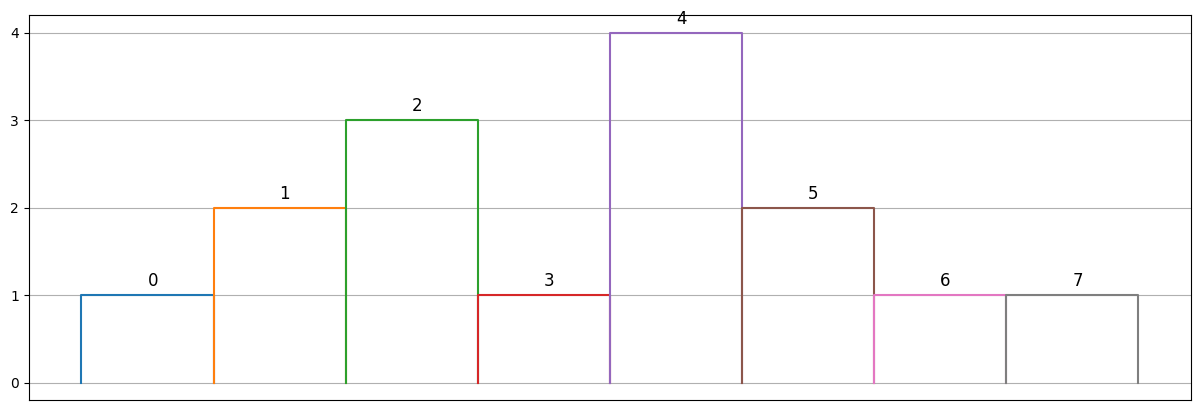

In [87]:
values = [1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 5, 6, 7, 0]

sorted_values = np.sort(values)
value_2_count = {}
for el in sorted_values:
    if el in value_2_count.keys():
        value_2_count[el] += 1
    else:
        value_2_count[el] = 1
        

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(np.arange(0, 10, 1))
plt.grid()

sorted_unique_values = sorted(set(values))
sorted_unique_values += [sorted_unique_values[-1]+1]

for ix, el in enumerate(sorted_unique_values[:-1]):
    xs = [el, el, sorted_unique_values[ix+1], sorted_unique_values[ix+1]]
    print(xs)
    ys = [0, value_2_count[el], value_2_count[el], 0]
    plt.plot(xs, ys)
    plt.text((el + sorted_unique_values[ix+1])/2, value_2_count[el] + 0.1, el, fontsize=12)
    plt.xticks([])

In [91]:
values = [1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 5, 5, 6, 7, 0]

[1 2 3 1 4 2 1 1] [0.    0.875 1.75  2.625 3.5   4.375 5.25  6.125 7.   ]


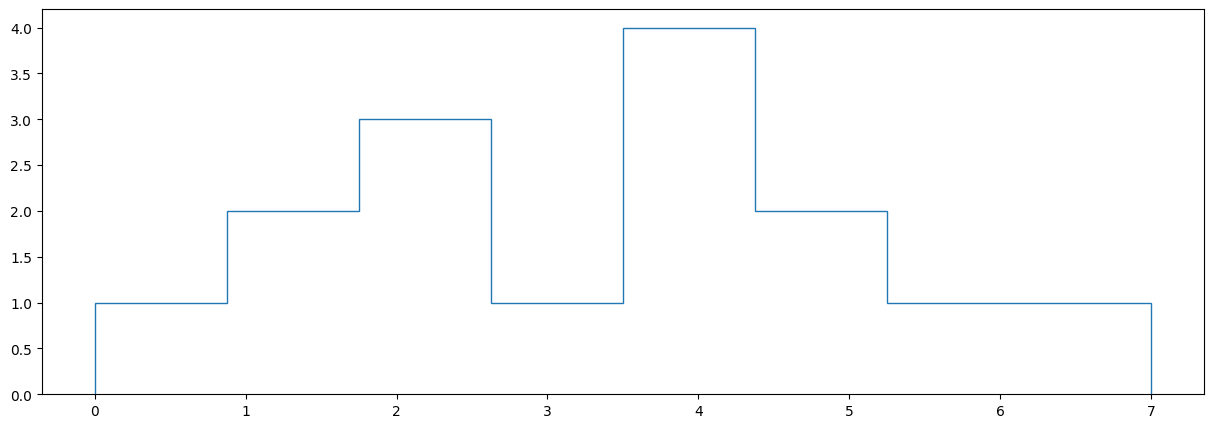

In [93]:
counts, bins = np.histogram(values, 8)
print(counts, bins)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
plt.stairs(counts, bins)

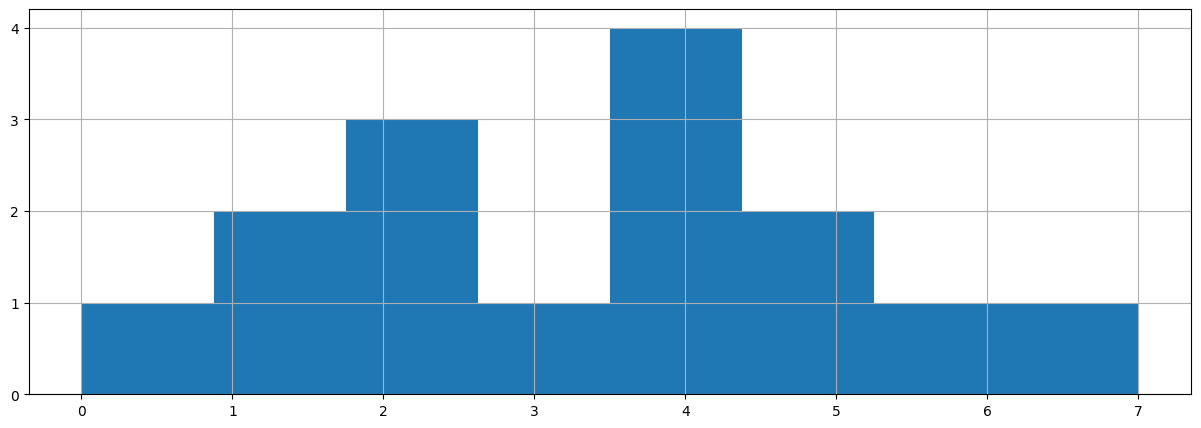

In [94]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_yticks(np.arange(0, 10, 1))
plt.hist(values, bins=8);

# Гистограмма = распределение

In [177]:
x1 = np.random.normal(0, 1.5, 100)
x2 = np.random.normal(15, 2.4, 100)
x3 = np.random.normal(30, 3, 100)
x = np.hstack([x1, x2, x3])

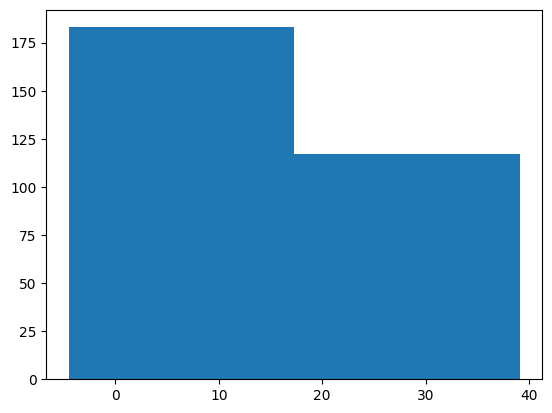

In [182]:
plt.hist(x, bins=2);

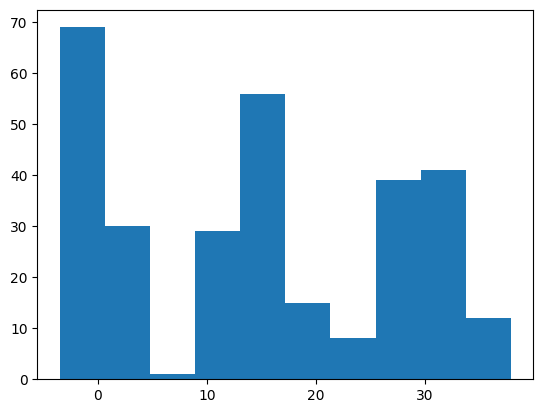

In [126]:
plt.hist(x);

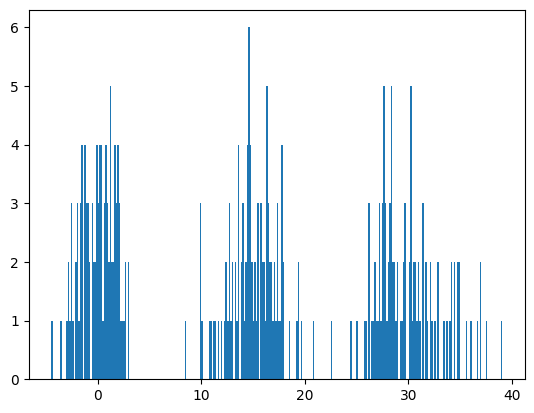

In [184]:
plt.hist(x, bins=300);

In [128]:
import seaborn as sns

<Axes: ylabel='Density'>

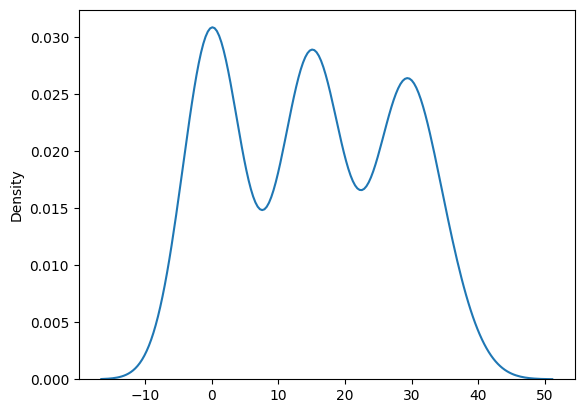

In [185]:
sns.kdeplot(x)

# Проверка гипотез

1. Есть какая-то идея
2. реализуете эту идею
3. Проверили на исторических данных, что ваш подход работает лучше предыдушего
4. Хотите протестировать не на истории, а на будущем
5. Разделяете пользователь на контрольную и тестовую выборки.
6. Ставите гипотезу
    1. Как правило (но не всегда), гипотеза звучит так: значимых различий между текущим подходом и новым нет. Это H0 гипотеза
    2. Если есть H0 гипотеза, то значит должна быть противоположная гипотеза H1 - различия есть.
    3. Определяете метрику, которую будете мерить и на которую будете смотреть. Например, это среднее
    4. Определяете какой стат тест вам нужен для проверки гипотезы
    5. Фиксируете размер выборки, который нужен для теста
    6. Фиксируете время, которое тест будет идти
    7. Фиксируете mde - minimal detectable effect (это пока опустим). Не так важно
    8. Выставляете порог значимости. Ошибка первого рода
7. Запускаете тест
8. Ждете заданное кол-во времени
9. Останавливаете тест
10. Берете данные в двух группах (контрольная и тестовая)
11. Считаете выбранную статистику
12. Подставляете эти значения в формулы стат теста
13. Получаете ответ. Так называемый p-value. Ответ на вопрос: есть ли основания отвергнуть нулевую гипотезу?
14. Идете к заказчику с результатами.

# Ошибка первого рода

### alpha. Как правило, она равна 0.05, но может быть как больше, так и меньше.

### Она задает вероятность отвергнуть нулевую гипотезу, когда она верна.

<img src="https://www.dummies.com/wp-content/uploads/362521.image0.jpg" alt="Alternative text" />

# p-value

### эта величина показывает следующее:

### Какова вероятность получить такие или большие различия при условия, что верна нулевая гипотеза?

# Стат тесты

In [186]:
import pandas as pd

In [187]:
df = pd.read_csv("./abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# Критерий Шапиро-Уилк, который проверяет а распределены данные нормально или нет.

# Нулевая гипотеза (H0): данные распределены нормально
# Альтернативная гипотеза (H1): данные распределены не нормально

In [188]:
import seaborn as sns
import numpy as np

from scipy.stats import shapiro

In [189]:
shapiro(df['Shell_weight'])

ShapiroResult(statistic=0.9704264402389526, pvalue=1.568114549655691e-28)

In [190]:
stat, p_value = shapiro(df['Shell_weight'])

print(f"p_value: {p_value}")

if p_value > 0.05:
    print("Ширина у раковины распределена нормально")
else:
    print("Ширина у раковины распределена НЕ нормально")

p_value: 1.568114549655691e-28
Ширина у раковины распределена НЕ нормально


/var/folders/tm/7068n1zn0813577ppwbwbvph0000gp/T/ipykernel_13600/3701678232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shell_weight'])


<Axes: xlabel='Shell_weight', ylabel='Density'>

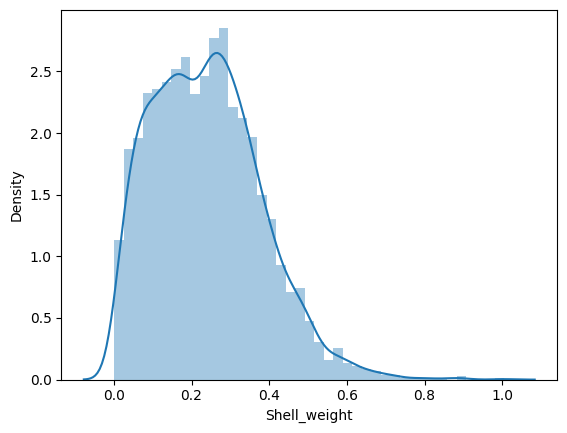

In [191]:
sns.distplot(df['Shell_weight'])

In [ ]:
# Можно также использовать критерий согласия Пирсона. 

In [192]:
from scipy.stats import normaltest

In [193]:
stat, p_value = normaltest(df['Shell_weight'])

print(f"p_value: {p_value}")

if p_value > 0.05:
    print("Ширина у раковины распределена нормально")
else:
    print("Ширина у раковины распределена НЕ нормально")

p_value: 1.988400082098343e-57
Ширина у раковины распределена НЕ нормально


In [65]:
# F(x) = P(X < x)

In [28]:
from scipy import stats
import matplotlib.pyplot as plt

[0.         0.         0.16666667 0.33333333 0.5        0.66666667
 0.83333333 1.         1.        ]


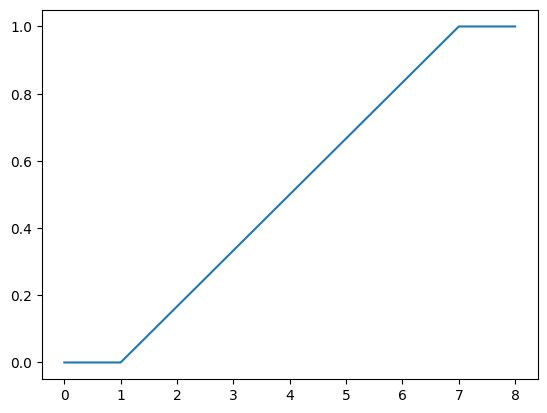

In [77]:
values = stats.uniform.cdf(range(0, 9), loc=1, scale=6)
print(values)
plt.plot(range(0,9), values)

<Axes: ylabel='Density'>

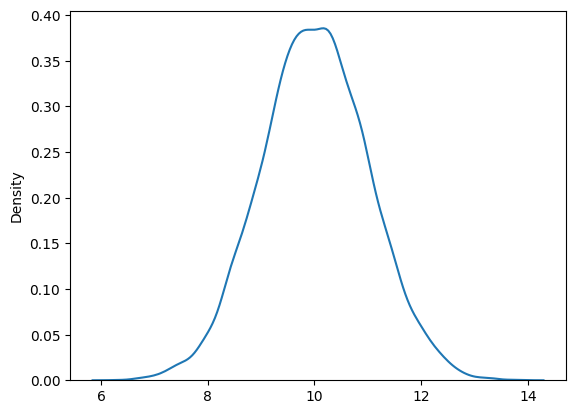

In [195]:
sns.kdeplot(stats.norm(10, 1).rvs(10000))

In [ ]:
F(x) = P(X < x)

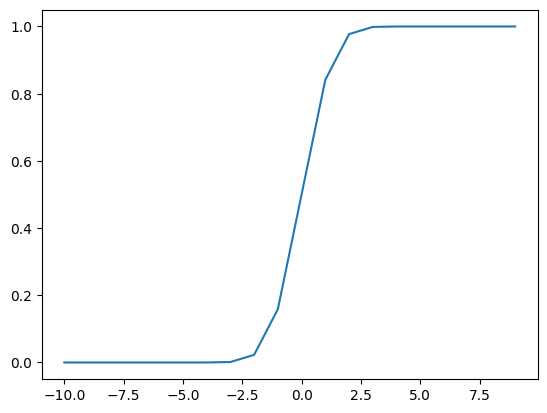

In [91]:
xs = range(-10,10)
values = stats.norm.cdf(xs, loc=0, scale=1)
plt.plot(xs, values)

In [101]:
# t-test - проверка средних двух выборок. 
# H0: гипотеза о том, что различий нет. То есть средние во второй и первой выборке одинаковые
# H1: гипотеза о том, что различия есть

In [196]:
from scipy.stats import ttest_ind

<Axes: ylabel='Density'>

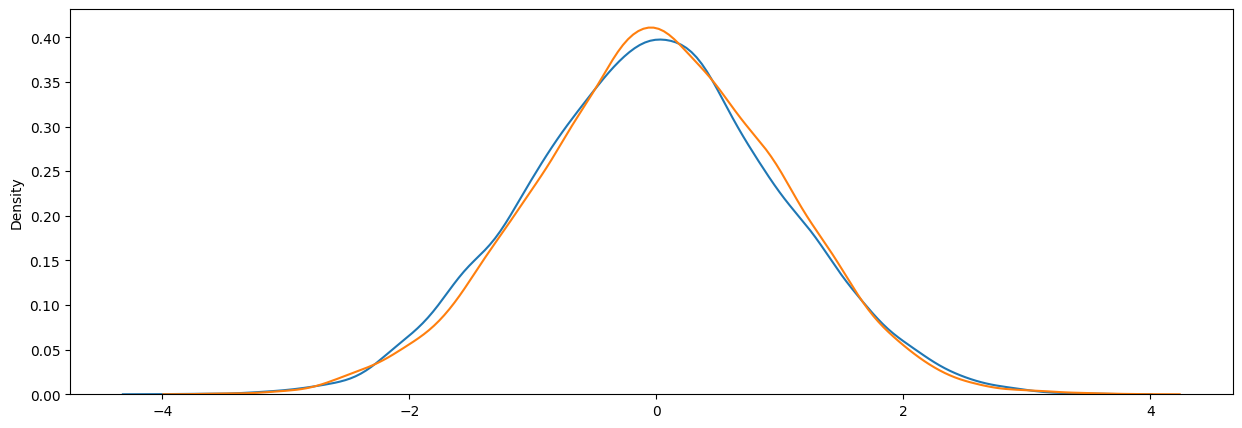

In [197]:
control = stats.norm(0, 1).rvs(10000)
test = stats.norm(0, 1).rvs(10000)

plt.figure(figsize=(15, 5))
plt.plot()
sns.kdeplot(control)
sns.kdeplot(test)

In [198]:
ttest_ind(sample1, sample2)

TtestResult(statistic=0.23903977291057937, pvalue=0.8137752623533925, df=18.0)

<Axes: ylabel='Density'>

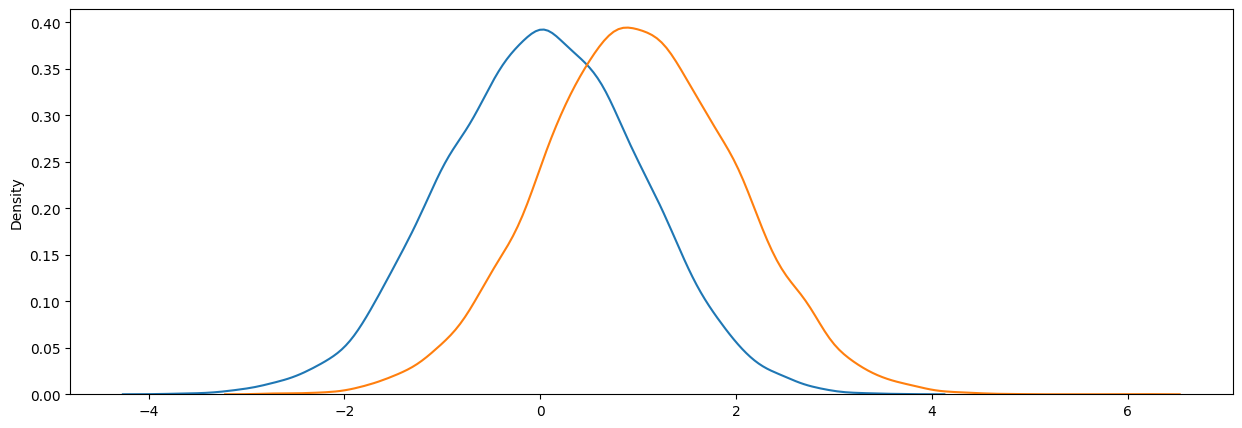

In [202]:
control = stats.norm(0, 1).rvs(10000)
test = stats.norm(1, 1).rvs(10000)

plt.figure(figsize=(15, 5))
plt.plot()
sns.kdeplot(control)
sns.kdeplot(test)

In [200]:
ttest_ind(sample1, sample2)

TtestResult(statistic=-69.66512126811179, pvalue=0.0, df=19998.0)

TtestResult(statistic=0.9110129053270739, pvalue=0.3743278880368005, df=18.0)

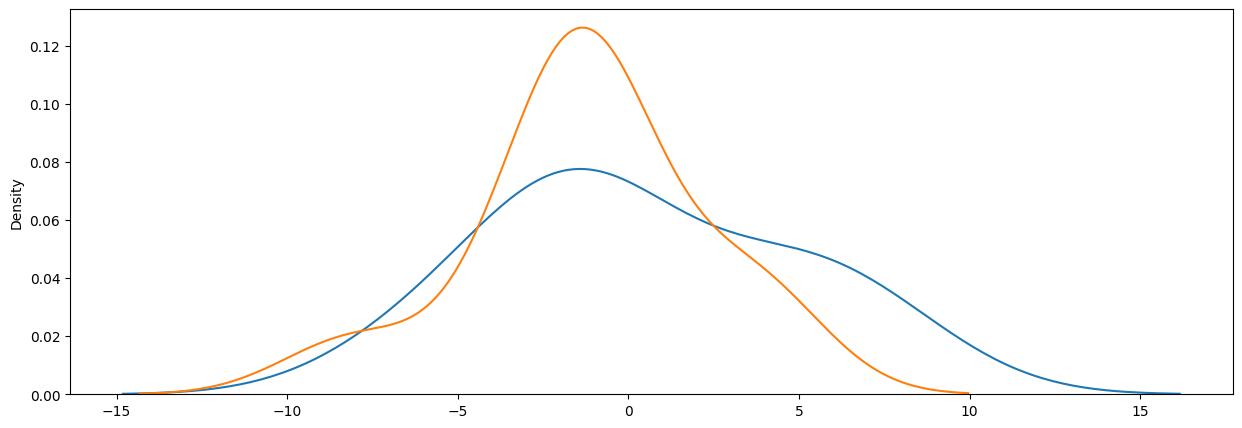

In [203]:
sample1 = stats.norm(0, 5).rvs(10)
sample2 = stats.norm(1, 5).rvs(10)

plt.figure(figsize=(15, 5))
plt.plot()
sns.kdeplot(sample1)
sns.kdeplot(sample2)

ttest_ind(sample1, sample2)

TtestResult(statistic=-1.421878441249419, pvalue=0.15663482194217582, df=198.0)

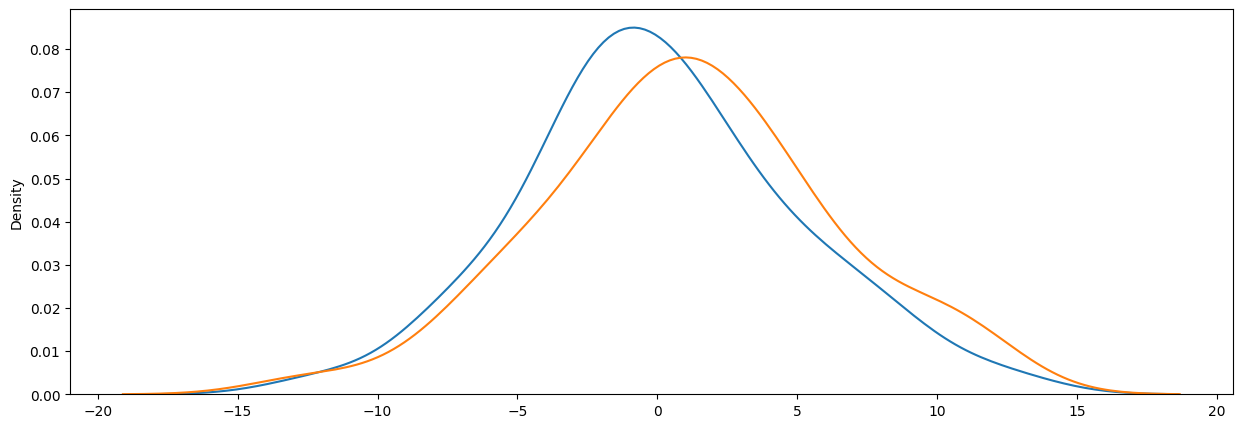

In [204]:
sample1 = stats.norm(0, 5).rvs(100)
sample2 = stats.norm(1, 5).rvs(100)

plt.figure(figsize=(15, 5))
plt.plot()
sns.kdeplot(sample1)
sns.kdeplot(sample2)

ttest_ind(sample1, sample2)

TtestResult(statistic=-2.945552810354069, pvalue=0.00347793785636641, df=298.0)

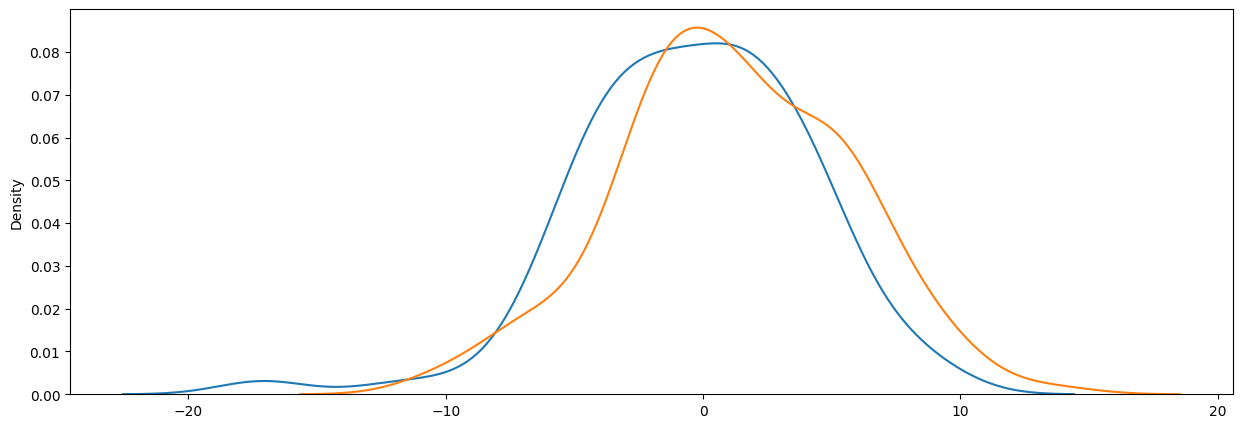

In [215]:
sample1 = stats.norm(0, 5).rvs(150)
sample2 = stats.norm(1, 5).rvs(150)

plt.figure(figsize=(15, 5))
plt.plot()
sns.kdeplot(sample1)
sns.kdeplot(sample2)

ttest_ind(sample1, sample2)

In [216]:
def create_sample(mean, std, size):
    return stats.norm(mean, std).rvs(size) 

Text(0.5, 0, 'days')

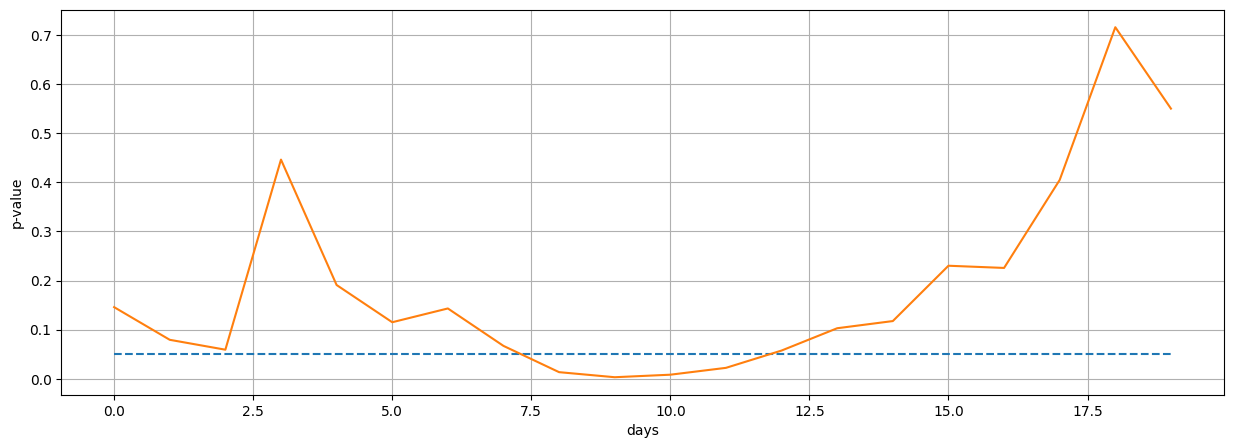

In [248]:
days = 20

total_p_values = []

total_control = None
total_test = None

for day in range(days):
    day_control = create_sample(0, 1, 10)
    day_test = create_sample(0.1, 1, 10)
    if total_control is None:
        total_control = day_control
        total_test = day_test
    else:
        total_control = np.hstack([total_control, day_control])
        total_test = np.hstack([total_test, day_test])
        
    _, p_value = ttest_ind(total_control, total_test)
    total_p_values.append(p_value)
    
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(range(len(total_p_values)), [0.05 for _ in range(len(total_p_values))], '--')
plt.plot(total_p_values)
plt.ylabel("p-value")
plt.xlabel("days")

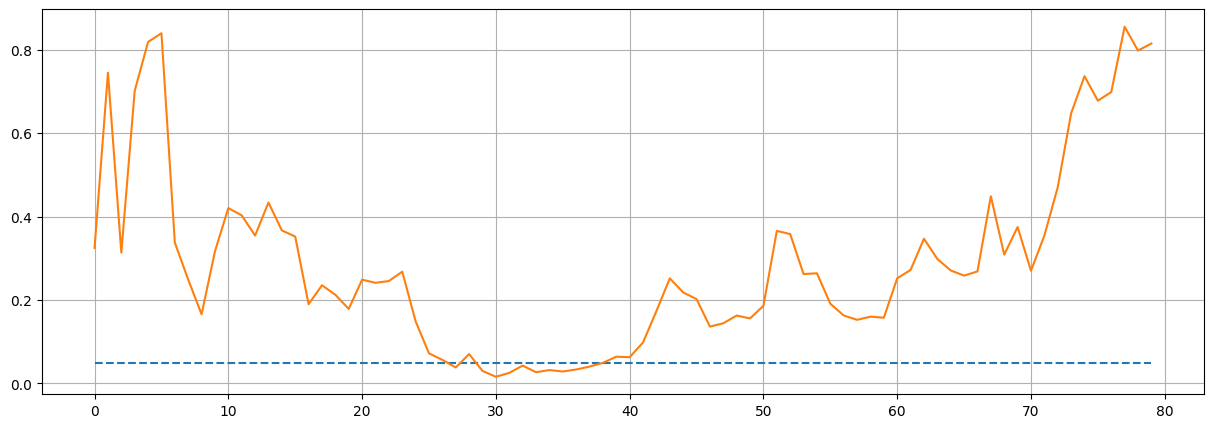

In [161]:
days = 80

total_p_values = []

total_control = None
total_test = None

for day in range(days):
    day_control = create_sample(0, 1, 10)
    day_test = create_sample(0, 1, 10)
    if total_control is None:
        total_control = day_control
        total_test = day_test
    else:
        total_control = np.hstack([total_control, day_control])
        total_test = np.hstack([total_test, day_test])
        
    _, p_value = ttest_ind(total_control, total_test)
    total_p_values.append(p_value)
    
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(range(len(total_p_values)), [0.05 for _ in range(len(total_p_values))], '--')
plt.plot(total_p_values)